<a href="https://colab.research.google.com/github/travallons/flaidds3/blob/main/Explorando_Dados_com_Python_Flai_Rodrigo_Praval%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explorando Dados com Pandas**

Como forma de trazer informações rápidas e assertivas, a partir do dataset abaixo, dentre as questões levantadas escolhi quatro tópicos que considero como de maior importância:

1.   Média Salarial;
2.   Tempo de experiência;
3.   O porte das empresas em que trabalham;
4.   Habilidades;

A pesquisa foi retirada do: https://www.kaggle.com/datahackers/pesquisa-data-hackers-2019




## **1. Processo de importação**

Importando e entendendo o dataset.

In [96]:
import pandas as pd

In [97]:
caminho = 'https://raw.githubusercontent.com/travallons/flaidds3/main/datasets/datahackers-survey-2019-anonymous-responses.csv'
dados = pd.read_csv(caminho)
dados.shape

(1765, 170)

In [98]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Columns: 170 entries, ('P0', 'id') to ('D6', 'anonymized_role')
dtypes: float64(5), int64(146), object(19)
memory usage: 2.3+ MB


In [99]:
dados.head(7)

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,

## **2. Olhando a ponta do Iceberg**

Ponto de partida para compreender o dataset e então traçar caminhos que através do EDA tragam insights para os próximos passos.

In [100]:
dados.isnull().sum() != 0

# Campos com output True significam que possuem respostas nulas/em branco e os output False que estão preenchidos

('P0', 'id')                          False
('P1', 'age')                          True
('P2', 'gender')                       True
('P3', 'living_in_brasil')            False
('P5', 'living_state')                 True
                                      ...  
('D2', 'origin_macroregion')           True
('D3', 'anonymized_degree_area')       True
('D4', 'anonymized_market_sector')     True
('D5', 'anonymized_manager_level')     True
('D6', 'anonymized_role')              True
Length: 170, dtype: bool

In [101]:
(dados.isnull().sum()[dados.isnull().sum() != 0]/dados.shape[0]).sort_values(ascending = False)

('P35', 'other')                                 0.920680
('D5', 'anonymized_manager_level')               0.827195
('D2', 'origin_macroregion')                     0.815864
('P29', 'have_data_warehouse')                   0.550708
('P22', 'most_used_proggraming_languages')       0.486686
('D6', 'anonymized_role')                        0.291218
('D1', 'living_macroregion')                     0.190935
('P5', 'living_state')                           0.190935
('D4', 'anonymized_market_sector')               0.137677
('P16', 'salary_range')                          0.134844
('P13', 'manager')                               0.134844
('P12', 'workers_number')                        0.134844
('P35', 'data_science_plataforms_preference')    0.079320
('D3', 'anonymized_degree_area')                 0.019830
('P6', 'born_or_graduated')                      0.019263
('P1', 'age')                                    0.013598
('P36', 'draw_participation')                    0.002266
('P2', 'gender

A informação acima consta a porcentagem de campos nulos que o dataset contém, essa informação é importante para prosseguir com análise dos dados, reconhecimento de outliers e desenvolvimento de modelos preditivos.

In [102]:
dados["('D6', 'anonymized_role')"].value_counts()

Desenvolvedor ou Engenheiro de Software    225
Outras                                     220
Data Scientist/Cientista de Dados          167
Data Analyst/Analista de Dados             163
Business Intelligence/Analista de BI       150
Data Engineer/Engenheiro de Dados          130
Business Analyst/Analista de Negócios       72
Analista de Inteligência de Mercado         29
Engenheiro                                  26
Analista de Marketing                       19
Engenheiro de Machine Learning              15
DBA/Administrador de Banco de Dados         14
Estatístico                                 11
Economista                                  10
Name: ('D6', 'anonymized_role'), dtype: int64

Temos todos os cargos que constam no dataset classificados do maior para o menor, como são muitas classes (muitas delas similares) é interessante agrupar cargos afins com intuito de refinar a informação.

In [103]:
dados["('P12', 'workers_number')"].value_counts()

Acima de 3000     393
de 101 a 500      333
de 11 a 50        204
de 501 a 1000     172
de 1001 a 3000    164
de 51 a 100       128
de 1 a 5           72
de 6 a 10          61
Name: ('P12', 'workers_number'), dtype: int64

O porte das empresas é outro caso a considerar um agrupamento mais dinâmico facilitando o entendimento dos níveis de estruturas das organizações.

In [104]:
 dados["('P17', 'time_experience_data_science')"].value_counts()

Menos de 1 ano                            445
de 1 a 2 anos                             343
de 2 a 3 anos                             244
Não tenho experiência na área de dados    221
de 4 a 5 anos                             186
de 6 a 10 anos                            179
Mais de 10 anos                           147
Name: ('P17', 'time_experience_data_science'), dtype: int64

Temos aqui algumas classificações que geram dúvidas, exemplo:

*   1 a 2
*   2 a 3
*   4 a 5

Pode gerar dúvidas do intervalo 3 a 4, que não consta no dataset, onde estaria exatemente inserido, portanto agrupar essas classificações trará uma uniformadade e mais confiabilidade na informação.

In [105]:
dados["('P13', 'manager')"].value_counts()

0.0    1222
1.0     305
Name: ('P13', 'manager'), dtype: int64

Acima temos a distribuição dos respondentes que são ou não gestores.
Evidenciando que do total respondido, 20% são gestores.

In [106]:
 dados["('P16', 'salary_range')"].value_counts()

de R$ 4.001/mês a R$ 6.000/mês      308
de R$ 8.001/mês a R$ 12.000/mês     237
de R$ 6.001/mês a R$ 8.000/mês      229
de R$ 3.001/mês a R$ 4.000/mês      219
de R$ 1.001/mês a R$ 2.000/mês      181
de R$ 2.001/mês a R$ 3000/mês       150
de R$ 12.001/mês a R$ 16.000/mês     82
Menos de R$ 1.000/mês                48
de R$ 16.001/mês a R$ 20.000/mês     45
de R$ 20.001/mês a R$ 25.000/mês     15
Acima de R$ 25.001/mês               13
Name: ('P16', 'salary_range'), dtype: int64

A faixa salarial será melhor resentanda usando a média do intervalo da classificação.

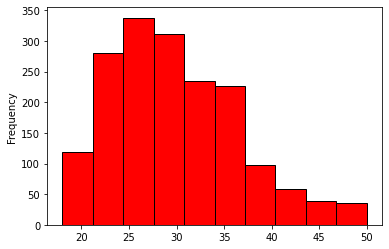

In [107]:
dados["('P1', 'age')"].plot(kind = 'hist', color = 'red', edgecolor = 'black')

O gráfico acima ressalta a distribuição de respondentes por idade, mostrando que os profissionais da área de dados são em sua maioria entre 21 a 31 anos.

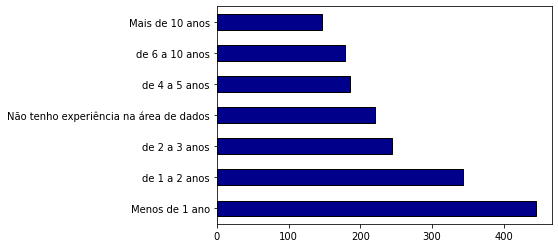

In [108]:
dados["('P17', 'time_experience_data_science')"].value_counts().plot(kind = 'barh', color = 'darkblue', edgecolor = 'black')

O plot acima reafirma que a profissão em si também é nova pois a massa de experiência se concentra de menos de 1 ano até 3 anos de experiência.

## **3. Ajustando os dados**

In [109]:
#Agrupamento de Profissões
profmap = {'Desenvolvedor ou Engenheiro de Software': 'Desenvolvedor/Engenheiro de Software',
                                            'Outras': 'Outras',
                 'Data Scientist/Cientista de Dados': 'Cientista de Dados',
                    'Data Analyst/Analista de Dados': 'Analista de Dados',
              'Business Intelligence/Analista de BI': 'Analista de BI',
                 'Data Engineer/Engenheiro de Dados': 'Engenheiro de Dados',
             'Business Analyst/Analista de Negócios': 'Analista de BI',
               'Analista de Inteligência de Mercado': 'Analista de BI',
                                        'Engenheiro': 'Outras',
                             'Analista de Marketing': 'Outras',
                    'Engenheiro de Machine Learning': 'Cientista de Dados',
               'DBA/Administrador de Banco de Dados': 'Engenheiro de Dados',
                                       'Estatístico': 'Cientista de Dados',
                                        'Economista': 'Outras'}


#Criando tamanho da empresa
tammap = {'de 1 a 5': 'Pequena',
         'de 6 a 10': 'Pequena',
        'de 11 a 50': 'Pequena',
       'de 51 a 100': 'Pequena',
      'de 101 a 500': 'Média',
     'de 501 a 1000': 'Média',
    'de 1001 a 3000': 'Grande',
     'Acima de 3000': 'Grande'}


#Recategorizando Experiência
temp_xp_ds = {'Não tenho experiência na área de dados': 'Sem Experiência',
                                      'Menos de 1 ano': 'Até 1 ano',
                                       'de 1 a 2 anos': 'De 1 a 3 anos',
                                       'de 2 a 3 anos': 'De 1 a 3 anos',
                                       'de 4 a 5 anos': 'De 3 a 5 anos',
                                      'de 6 a 10 anos': 'Maior que 5 anos',
                                     'Mais de 10 anos': 'Maior que 5 anos'}


#Discretizando salário
salmap = { 'Menos de R$ 1.000/mês': 1000,
  'de R$ 1.001/mês a R$ 2.000/mês': 1500,
   'de R$ 2.001/mês a R$ 3000/mês': 2500,
  'de R$ 3.001/mês a R$ 4.000/mês': 3500,
 'de R$ 4.001/mês a R$ 6.000/mês': 5000,
  'de R$ 6.001/mês a R$ 8.000/mês': 7000,
 'de R$ 8.001/mês a R$ 12.000/mês': 10000,
'de R$ 12.001/mês a R$ 16.000/mês': 14000,
'de R$ 16.001/mês a R$ 20.000/mês': 18000,
'de R$ 20.001/mês a R$ 25.000/mês': 22500,
          'Acima de R$ 25.001/mês': 25000}


#Discretização de Idade
cortes = [0, 24, 30, 40, 100]
fxidade = ['[18,24]', '[25,30]', '[31,40]', '[41,50]']


#Criando um novo dataset com as informações de maior interesse
dados['idade'] = pd.cut(dados["('P1', 'age')"], bins = cortes, labels = fxidade)
dados['profissao'] = dados["('D6', 'anonymized_role')"].map(profmap)
dados['salario'] = dados["('P16', 'salary_range')"].map(salmap)
dados['tamanho_da_empresa'] = dados["('P12', 'workers_number')"].map(tammap)
dados['gestor'] = dados["('P13', 'manager')"].map({0.0: 'não', 1.0: 'sim'})
dados['se_considera_ds'] = dados["('P19', 'is_data_science_professional')"].map({0: 'Não', 1: 'Sim'})
dados['sexo'] = dados["('P2', 'gender')"]
dados['experiencia_ds'] = dados["('P17', 'time_experience_data_science')"].map(temp_xp_ds)
dados['tipo_de_trabalho'] = dados["('P10', 'job_situation')"]
dados['area_de_formacao'] = dados["('D3', 'anonymized_degree_area')"]
dados['setor_de_mercado'] = dados["('D4', 'anonymized_market_sector')"]
dados['plataforma_favorita'] = dados["('P35', 'data_science_plataforms_preference')"]


#Criando conjuntos de dados convenientes através de alguns filtros
#Profissões de dados

lista = ['Cientista de Dados', 'Analista de Dados', 'Analista de BI', 'Engenheiro de Dados']
pds = dados[dados['profissao'].isin(lista)]
cds = dados[dados['profissao'] == 'Cientista de Dados']
ads = dados[dados['profissao'] == 'Analista de Dados']
abi = dados[dados['profissao'] == 'Analista de BI']
eds = dados[dados['profissao'] == 'Engenheiro de Dados']

Reclassificando:

1.   Profissões
2.   Porte da empresa
3.   Tempo de experiência
4.   Salários
5.   Faixa de idade

*Deixando pronto variáveis para consultas e análises*

In [110]:
cds.shape

(193, 182)

## **4. Perfil do Profissional de Dados**

Com intuito de exemplificar o EDA (Exploratory Data Analysis, que significa Análise Exploratória de Dados) sem poluir o notebook, usarei como foco o perfil Cientista de Dados através da variável cds.

*Caso eu quisesse averiguar o perfil do Analista de Dados ou Analista de BI bastava trocar o nome da variável para as suas respectivas.*

### **4.1 Média Salarial**

In [111]:
pds['salario'].groupby(pds['profissao']).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
profissao,,,,,,,,
Analista de BI,251.0,4978.09,3048.04,1000.0,2500.0,5000.0,7000.0,14000.0
Analista de Dados,163.0,5036.81,2890.26,1000.0,3500.0,5000.0,7000.0,18000.0
Cientista de Dados,193.0,6831.61,4725.69,1000.0,3500.0,5000.0,10000.0,25000.0
Engenheiro de Dados,144.0,7802.08,4856.41,1500.0,5000.0,7000.0,10000.0,25000.0


In [112]:
pds['salario'].groupby(pds['profissao']).describe()[['count', 'mean']].round(2)

,count,mean
profissao,,
Analista de BI,251.0,4978.09
Analista de Dados,163.0,5036.81
Cientista de Dados,193.0,6831.61
Engenheiro de Dados,144.0,7802.08


A média salarial entre Analista de BI e de Dados são bem próximas, entretanto a quantidade de profissionais que atuam com Inteligência de Negócios é superior as demais profissões.

In [113]:
pds.groupby(['profissao', 'experiencia_ds']).mean()['salario'].round(2)

profissao            experiencia_ds  
Analista de BI       Até 1 ano            3076.39
                     De 1 a 3 anos        4515.79
                     De 3 a 5 anos        6107.14
                     Maior que 5 anos     8372.34
                     Sem Experiência      3833.33
Analista de Dados    Até 1 ano            3431.82
                     De 1 a 3 anos        4650.00
                     De 3 a 5 anos        6260.87
                     Maior que 5 anos     7960.00
                     Sem Experiência      1500.00
Cientista de Dados   Até 1 ano            3675.00
                     De 1 a 3 anos        5930.69
                     De 3 a 5 anos       10648.15
                     Maior que 5 anos    11770.83
                     Sem Experiência      2500.00
Engenheiro de Dados  Até 1 ano            4816.67
                     De 1 a 3 anos        6509.09
                     De 3 a 5 anos        8840.91
                     Maior que 5 anos    12352.94
            

Com exceção do Engenheiro de Dados, as demais profissões possuem média salarial até 1 ano de experiência muito similares, entretanto quando olhamos os profissionais com mais de 5 anos de experiência, a diferença é maior. O que pode impactar na decisão de trajetória de carreira de um profissional.

In [114]:
pds['salario'].groupby(pds['sexo']).describe()[['count', 'mean']].round(2)

,count,mean
sexo,,
Feminino,136.0,5099.26
Masculino,614.0,6218.24


Um ponto importante a se levar em considerar é a proporção do gêneros dos profissionais de dados, onde apenas 18% são Mulheres e ganham em média R$ 1.100,00 reais a menos que os Homens.

In [115]:
cds.groupby(['sexo', 'tamanho_da_empresa']).mean()['salario'].round(2)

sexo       tamanho_da_empresa
Feminino   Grande                8785.71
           Média                 5352.94
           Pequena               3785.71
Masculino  Grande                8118.18
           Média                 7839.29
           Pequena               5060.00
Name: salario, dtype: float64

Por outro lado, quando olhamos o porte das empresas em que trabalham, Mulheres que são de empresas de Grande Porte, ganham em média um pouco a mais que Homens ao serem Cientistas de Dados.

### **4.2 Tempo de Experiência**

In [116]:
pds['profissao'].groupby(pds['experiencia_ds']).count()

experiencia_ds
Até 1 ano           186
De 1 a 3 anos       321
De 3 a 5 anos       100
Maior que 5 anos    130
Sem Experiência      14
Name: profissao, dtype: int64

In [117]:
pds.groupby(['profissao', 'experiencia_ds']).count()['sexo']

profissao            experiencia_ds  
Analista de BI       Até 1 ano            72
                     De 1 a 3 anos        95
                     De 3 a 5 anos        28
                     Maior que 5 anos     47
                     Sem Experiência       9
Analista de Dados    Até 1 ano            44
                     De 1 a 3 anos        70
                     De 3 a 5 anos        23
                     Maior que 5 anos     25
                     Sem Experiência       1
Cientista de Dados   Até 1 ano            39
                     De 1 a 3 anos       101
                     De 3 a 5 anos        27
                     Maior que 5 anos     24
                     Sem Experiência       1
Engenheiro de Dados  Até 1 ano            30
                     De 1 a 3 anos        55
                     De 3 a 5 anos        22
                     Maior que 5 anos     34
                     Sem Experiência       3
Name: sexo, dtype: int64

Os profissinais de dados possuem ainda um curto período de experiência: até 3 anos.
Muitos desses profissionais estão saindo do primeiro ano de experiência.

### **4.3 Porte das empresas em que trabalham**

In [118]:
pds['profissao'].groupby(pds['tamanho_da_empresa']).count()

tamanho_da_empresa
Grande     289
Média      289
Pequena    173
Name: profissao, dtype: int64

In [119]:
pds.groupby(['profissao', 'tamanho_da_empresa']).count()['sexo']

profissao            tamanho_da_empresa
Analista de BI       Grande                114
                     Média                  91
                     Pequena                46
Analista de Dados    Grande                 61
                     Média                  65
                     Pequena                37
Cientista de Dados   Grande                 62
                     Média                  73
                     Pequena                57
Engenheiro de Dados  Grande                 51
                     Média                  60
                     Pequena                33
Name: sexo, dtype: int64

As empresas de Grande e Médio porte concentram a maioria dos profissionais de Dados, um diferencial é que empresas de Grande porte possuem mais Analistas focados em Inteligência de Negócios.

### **4.4 Habilidades**

#### **4.4.1 Métodos mais usados**

A partir da classificação profissional refinada, uma comparação entre Cientista de Dados, Analista de Dados e Analista de BI mostrará quais métodos que cada profissional mais usa em sua rotina de trabalho.

In [120]:
cds.filter(regex = 'P20').sum().sort_values(ascending = False)/cds.shape[0]

('P20', 'linear_regression')             0.740933
('P20', 'logistic_regression')           0.673575
('P20', 'decision_tree')                 0.652850
('P20', 'random_forest')                 0.647668
('P20', 'cluster_analysis')              0.601036
('P20', 'neural_networks')               0.461140
('P20', 'gradient_boosted_machines')     0.445596
('P20', 'ensemble')                      0.398964
('P20', 'nlp')                           0.352332
('P20', 'bayesian_inference')            0.321244
('P20', 'svms')                          0.305699
('P20', 'glms')                          0.290155
('P20', 'rnns')                          0.181347
('P20', 'longitudinal_data_analysis')    0.176166
('P20', 'cnns')                          0.165803
('P20', 'markov_chains')                 0.134715
('P20', 'survival_analysis')             0.134715
('P20', 'joint analysis')                0.067358
('P20', 'gans')                          0.046632
('P20', 'hmms')                          0.041451


 O output nos mostra claramente que para um Cientista de Dados os três métodos mais utilizados são:

1.   Regressão Linear
2.   Regressão Logística
3.   Árvore de Decisão

In [121]:
ads.filter(regex = 'P20').sum().sort_values(ascending = False)/ads.shape[0]

('P20', 'linear_regression')             0.361963
('P20', 'logistic_regression')           0.300613
('P20', 'decision_tree')                 0.276074
('P20', 'cluster_analysis')              0.251534
('P20', 'no_listed_methods')             0.251534
('P20', 'random_forest')                 0.214724
('P20', 'bayesian_inference')            0.159509
('P20', 'nlp')                           0.141104
('P20', 'joint analysis')                0.067485
('P20', 'svms')                          0.067485
('P20', 'neural_networks')               0.067485
('P20', 'gradient_boosted_machines')     0.055215
('P20', 'glms')                          0.055215
('P20', 'ensemble')                      0.042945
('P20', 'survival_analysis')             0.042945
('P20', 'longitudinal_data_analysis')    0.036810
('P20', 'markov_chains')                 0.030675
('P20', 'cnns')                          0.024540
('P20', 'rnns')                          0.012270
('P20', 'gans')                          0.000000


O Analista de Dados possui métodos iguais aos de um Cientista de Dados, porém a frequência de uso em análise de dados é a metade usada na ciência de dados.

In [122]:
abi.filter(regex = 'P20').sum().sort_values(ascending = False)/eds.shape[0]

('P20', 'no_listed_methods')             0.347222
('P20', 'linear_regression')             0.326389
('P20', 'decision_tree')                 0.229167
('P20', 'cluster_analysis')              0.194444
('P20', 'logistic_regression')           0.180556
('P20', 'nlp')                           0.131944
('P20', 'bayesian_inference')            0.111111
('P20', 'neural_networks')               0.111111
('P20', 'random_forest')                 0.097222
('P20', 'markov_chains')                 0.041667
('P20', 'glms')                          0.041667
('P20', 'joint analysis')                0.041667
('P20', 'svms')                          0.041667
('P20', 'longitudinal_data_analysis')    0.034722
('P20', 'cnns')                          0.034722
('P20', 'gradient_boosted_machines')     0.034722
('P20', 'survival_analysis')             0.020833
('P20', 'rnns')                          0.013889
('P20', 'ensemble')                      0.006944
('P20', 'hmms')                          0.000000


Um Analista de BI embora use Regressão Linear e Árvore de decisão (mesmos métodos dos dois tipos de profissionais citados anteriormente), tem em seu arcabouço outros métodos não listados.

In [123]:
pds.filter(regex = 'P20').sum().sort_values(ascending = False)/pds.shape[0]

('P20', 'linear_regression')             0.383489
('P20', 'decision_tree')                 0.306258
('P20', 'logistic_regression')           0.300932
('P20', 'cluster_analysis')              0.274301
('P20', 'random_forest')                 0.262317
('P20', 'no_listed_methods')             0.186418
('P20', 'neural_networks')               0.178429
('P20', 'nlp')                           0.177097
('P20', 'bayesian_inference')            0.158455
('P20', 'gradient_boosted_machines')     0.143808
('P20', 'ensemble')                      0.123835
('P20', 'svms')                          0.111851
('P20', 'glms')                          0.097204
('P20', 'cnns')                          0.063915
('P20', 'longitudinal_data_analysis')    0.062583
('P20', 'rnns')                          0.059920
('P20', 'markov_chains')                 0.051931
('P20', 'survival_analysis')             0.050599
('P20', 'joint analysis')                0.047936
('P20', 'hmms')                          0.013316


De forma geral, o profissional de dados tem no output acima os métodos mais utilizados na rotina de trabalho.

Ressaltando métodos como:


1.   Regressão Linear;
2.   Árvore de Decisão;
3.   Regressão Logística;



#### **4.4.2 Linguagem de Programação**

A seguir temos a comparação das linguagens de programação mais usadas.

In [124]:
cds.filter(regex = 'P21').sum().sort_values(ascending = False)/cds.shape[0]

('P21', 'python')                 0.896373
('P21', 'sql_')                   0.730570
('P21', 'r')                      0.383420
('P21', 'sas_stata')              0.088083
('P21', 'scala')                  0.082902
('P21', 'visual_basic_vba')       0.051813
('P21', 'java')                   0.041451
('P21', 'c_c++_c#')               0.031088
('P21', 'matlab')                 0.025907
('P21', 'julia')                  0.010363
('P21', 'dotnet')                 0.010363
('P21', 'php')                    0.005181
('P21', 'no_listed_languages')    0.000000
dtype: float64

Python, SQL e R são as linguagens predominantes e principais de um Cientista de Dados.

In [125]:
ads.filter(regex = 'P21').sum().sort_values(ascending = False)/ads.shape[0]

('P21', 'sql_')                   0.723926
('P21', 'python')                 0.662577
('P21', 'r')                      0.233129
('P21', 'visual_basic_vba')       0.092025
('P21', 'sas_stata')              0.073620
('P21', 'php')                    0.061350
('P21', 'c_c++_c#')               0.055215
('P21', 'java')                   0.049080
('P21', 'matlab')                 0.030675
('P21', 'scala')                  0.030675
('P21', 'dotnet')                 0.012270
('P21', 'julia')                  0.006135
('P21', 'no_listed_languages')    0.000000
dtype: float64

Um Analista de Dados usa de forma quase igual a um Cientista de Dados a linguagem SQL, entretando para um Analista de Dados SQL é seu carro de chefe em comparação ao Cientista que tem como primeiro lugar Python.

In [126]:
abi.filter(regex = 'P21').sum().sort_values(ascending = False)/ads.shape[0]

('P21', 'sql_')                   0.588957
('P21', 'python')                 0.441718
('P21', 'r')                      0.202454
('P21', 'visual_basic_vba')       0.085890
('P21', 'sas_stata')              0.061350
('P21', 'java')                   0.024540
('P21', 'c_c++_c#')               0.024540
('P21', 'no_listed_languages')    0.018405
('P21', 'php')                    0.018405
('P21', 'dotnet')                 0.018405
('P21', 'matlab')                 0.012270
('P21', 'scala')                  0.012270
('P21', 'julia')                  0.006135
dtype: float64

De forma equilibrada, os Analistas de BI tem quase que paralelo o uso de SQL e Python, não com tanta frequência que um Cientista ou Analista de Dados.

In [127]:
pds.filter(regex = 'P21').sum().sort_values(ascending = False)/pds.shape[0]

('P21', 'python')                 0.595206
('P21', 'sql_')                   0.588549
('P21', 'r')                      0.214381
('P21', 'scala')                  0.057257
('P21', 'sas_stata')              0.055925
('P21', 'visual_basic_vba')       0.054594
('P21', 'java')                   0.047936
('P21', 'c_c++_c#')               0.034621
('P21', 'php')                    0.023968
('P21', 'matlab')                 0.015979
('P21', 'dotnet')                 0.013316
('P21', 'julia')                  0.005326
('P21', 'no_listed_languages')    0.003995
dtype: float64

Em síntese, Python, SQL e R são as linguagens predominantes para um profissional da área de Dados.

In [128]:
cds[(cds["('P21', 'r')"] == 1) &
    (cds["('P21', 'python')"] == 0) &
    (cds["('P21', 'sql_')"] == 0)]['salario'].describe().round(2)

count        3.00
mean      6000.00
std       6946.22
min       1500.00
25%       2000.00
50%       2500.00
75%       8250.00
max      14000.00
Name: salario, dtype: float64

Raros os casos em que um Cientista de Dados usa exclusivamente linguagem R.

*oberservar count que é a quantidade de profissionais*

In [129]:
cds[(cds["('P21', 'r')"] == 0) &
    (cds["('P21', 'python')"] == 1) &
    (cds["('P21', 'sql_')"] == 1)]['salario'].describe().round(2)

count       75.00
mean      7006.67
std       4458.13
min       1000.00
25%       5000.00
50%       5000.00
75%      10000.00
max      22500.00
Name: salario, dtype: float64

39% dos Cientistas de Dados usam tanto Python quanto SQL, mas não usam R, uma parcela considerável.

In [130]:
cds[(cds["('P21', 'r')"] == 1) &
    (cds["('P21', 'python')"] == 1) &
    (cds["('P21', 'sql_')"] == 1)]['salario'].describe().round(2)

count       56.00
mean      6776.79
std       3971.40
min       1500.00
25%       3500.00
50%       6000.00
75%      10000.00
max      18000.00
Name: salario, dtype: float64

29% dos Cientistas de Dados usam as três linguagens principais.

In [131]:
cds[(cds["('P21', 'r')"] == 1) &
    (cds["('P21', 'python')"] == 1)]['salario'].describe().round(2)

count       65.00
mean      7138.46
std       4479.56
min       1500.00
25%       3500.00
50%       7000.00
75%      10000.00
max      25000.00
Name: salario, dtype: float64

34% dos Cientistas de Dados afirmam usar tanto Python como R.

In [132]:
cds[(cds["('P21', 'r')"] == 1) &
    (cds["('P21', 'python')"] == 0)]['salario'].describe().round(2)

count        9.00
mean      5111.11
std       4350.13
min       1500.00
25%       2500.00
50%       3500.00
75%       7000.00
max      14000.00
Name: salario, dtype: float64

Perfil salarial do Cientista de Dados que usa R mas não usa Python.

*observar o mean que é a média*

In [133]:
cds[(cds["('P21', 'r')"] == 0) &
    (cds["('P21', 'python')"] == 1)]['salario'].describe().round(2)

count      108.00
mean      6736.11
std       4621.39
min       1000.00
25%       3500.00
50%       5000.00
75%      10000.00
max      25000.00
Name: salario, dtype: float64

Inversamente, temos o perfil salarial do Cientista de Dados que usa Python mas não usa R.

*observar o mean que é a média*

#### **4.4.3 Data Visualization**

In [134]:
cds.filter(regex = 'P27').sum().sort_values(ascending = False)/cds.shape[0]

('P27', 'microsoft_powerbi')               0.336788
('P27', 'no_bi_tool_at_work')              0.217617
('P27', 'metabase')                        0.186528
('P27', 'tableau')                         0.176166
('P27', 'google_data_studio')              0.134715
('P27', 'qlik_view_qlik_sense')            0.088083
('P27', 'other')                           0.077720
('P27', 'only_excel_gsheets')              0.077720
('P27', 'redash')                          0.041451
('P27', 'ibm_analytics_cognos')            0.025907
('P27', 'microstrategy')                   0.020725
('P27', 'superset')                        0.020725
('P27', 'looker')                          0.015544
('P27', 'oracle_business_intelligence')    0.005181
('P27', 'sap_business_objects')            0.005181
('P27', 'birst')                           0.000000
dtype: float64

Para o perfil de Cientista de Dados, a ferramenta de Visualização de Dados Power BI da Microsoft está entre a mais usada.

In [135]:
ads.filter(regex = 'P27').sum().sort_values(ascending = False)/cds.shape[0]

('P27', 'microsoft_powerbi')               0.331606
('P27', 'tableau')                         0.202073
('P27', 'google_data_studio')              0.165803
('P27', 'metabase')                        0.134715
('P27', 'only_excel_gsheets')              0.088083
('P27', 'other')                           0.062176
('P27', 'qlik_view_qlik_sense')            0.062176
('P27', 'no_bi_tool_at_work')              0.056995
('P27', 'redash')                          0.031088
('P27', 'sap_business_objects')            0.020725
('P27', 'ibm_analytics_cognos')            0.020725
('P27', 'microstrategy')                   0.020725
('P27', 'superset')                        0.020725
('P27', 'looker')                          0.010363
('P27', 'oracle_business_intelligence')    0.005181
('P27', 'birst')                           0.000000
dtype: float64

In [136]:
abi.filter(regex = 'P27').sum().sort_values(ascending = False)/cds.shape[0]

('P27', 'microsoft_powerbi')               0.357513
('P27', 'tableau')                         0.124352
('P27', 'qlik_view_qlik_sense')            0.108808
('P27', 'only_excel_gsheets')              0.103627
('P27', 'other')                           0.082902
('P27', 'metabase')                        0.067358
('P27', 'google_data_studio')              0.056995
('P27', 'no_bi_tool_at_work')              0.036269
('P27', 'microstrategy')                   0.036269
('P27', 'sap_business_objects')            0.031088
('P27', 'ibm_analytics_cognos')            0.025907
('P27', 'superset')                        0.015544
('P27', 'oracle_business_intelligence')    0.010363
('P27', 'looker')                          0.005181
('P27', 'birst')                           0.000000
('P27', 'redash')                          0.000000
dtype: float64

Percebe-se que o Analista de Dados usa mais as plataformas Tableau e Google Data Studio que um analista de BI.

Já o Power BI da Microsoft tem certa igualdade entre os profissionais.

In [137]:
pds.filter(regex = 'P27').sum().sort_values(ascending = False)/pds.shape[0]

('P27', 'microsoft_powerbi')               0.307590
('P27', 'tableau')                         0.165113
('P27', 'metabase')                        0.133156
('P27', 'no_bi_tool_at_work')              0.109188
('P27', 'google_data_studio')              0.109188
('P27', 'qlik_view_qlik_sense')            0.077230
('P27', 'only_excel_gsheets')              0.074567
('P27', 'other')                           0.063915
('P27', 'redash')                          0.026631
('P27', 'microstrategy')                   0.023968
('P27', 'ibm_analytics_cognos')            0.021305
('P27', 'sap_business_objects')            0.015979
('P27', 'superset')                        0.015979
('P27', 'looker')                          0.013316
('P27', 'oracle_business_intelligence')    0.005326
('P27', 'birst')                           0.001332
dtype: float64

Em nosso dataset evidenciamos que a ferramenta Power BI é a dominante entre os profissionais de dados com praticamente o dobro de usuários do que o segundo colocado Tableau.

#### **4.4.4 Cursos e Qualificações**

A seguir temos as empresas de qualificações que os profissionais de dados recorrem para aprimorar suas habilidades.

In [138]:
cds.filter(regex = 'P34').sum().sort_values(ascending = False)/cds.shape[0]

('P34', 'udemy')             0.663212
('P34', 'coursera')          0.632124
('P34', 'udacity')           0.487047
('P34', 'data_camp')         0.393782
('P34', 'edx')               0.300518
('P34', 'kaggle_learn')      0.295337
('P34', 'height')            0.129534
('P34', 'online_courses')    0.056995
('P34', 'other')             0.046632
('P34', 'data_quest')        0.046632
dtype: float64

In [139]:
ads.filter(regex = 'P34').sum().sort_values(ascending = False)/cds.shape[0]

('P34', 'udemy')             0.626943
('P34', 'coursera')          0.367876
('P34', 'udacity')           0.279793
('P34', 'data_camp')         0.186528
('P34', 'kaggle_learn')      0.176166
('P34', 'other')             0.150259
('P34', 'height')            0.145078
('P34', 'edx')               0.113990
('P34', 'online_courses')    0.051813
('P34', 'data_quest')        0.031088
dtype: float64

In [140]:
abi.filter(regex = 'P34').sum().sort_values(ascending = False)/cds.shape[0]

('P34', 'udemy')             0.922280
('P34', 'udacity')           0.352332
('P34', 'coursera')          0.326425
('P34', 'height')            0.248705
('P34', 'other')             0.243523
('P34', 'kaggle_learn')      0.212435
('P34', 'data_camp')         0.202073
('P34', 'edx')               0.150259
('P34', 'online_courses')    0.108808
('P34', 'data_quest')        0.046632
dtype: float64

In [141]:
pds.filter(regex = 'P34').sum().sort_values(ascending = False)/pds.shape[0]

('P34', 'udemy')             0.697736
('P34', 'coursera')          0.415446
('P34', 'udacity')           0.348868
('P34', 'data_camp')         0.235686
('P34', 'kaggle_learn')      0.193076
('P34', 'height')            0.183755
('P34', 'edx')               0.165113
('P34', 'other')             0.129161
('P34', 'online_courses')    0.074567
('P34', 'data_quest')        0.038615
dtype: float64

Tanto para um cientista de Dados, como para todos os profissionais de dados de forma geral, tanto Udemy e Coursera, são as plataformas predominantes ao se buscar qualificações profissionais.

## **Conclusão**

A profissão na área Dados como conhecemos hoje é recente e muitas terminologias de cargos se assemelham, mas ao explorar as nuances de cada um, observa-se que:
Um Cientista de Dados tem um foco maior em métodos preditivos e no uso da linguagem de programação
